# PROJECT- PRCP-1007-LiverPatientPred

Author - Sreekanth P, Date: 27-08-2025

# Abstract

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset is used to evaluate prediction algorithms in an effort to reduce burden on doctors.

Domain: Healthcare

Dataset: Indian Liver Patient Dataset (as linked in project brief)

Objective:Explore the dataset, build multiple classifiers to predict liver disease, compare models, and document challenges.

# Content

This dataset contains **416 liver patient records** and **167 non-liver patient records** collected from **North East of Andhra Pradesh, India**.  
The **"Target"** column is a class label used to divide groups into liver patients (liver disease) or not (no disease).  

This dataset contains **441 male** patient records and **142 female** patient records.  
Any patient whose age exceeded **89** is listed as being of age **"90"**.


# Attributes

- **Age of the patient**
- **Gender of the patient**
- **Total Bilirubin**
- **Direct Bilirubin**
- **Alkaline Phosphotase**
- **Alamine Aminotransferase**
- **Aspartate Aminotransferase**
- **Total Proteins**
- **Albumin**
- **Albumin and Globulin Ratio**
- **Target:** field used to split the data into two sets  
  - **1** = patient with liver disease  
  - **2** = patient with no liver disease


# Import Libraries & Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

# Basic Checks

In [4]:
data

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
data.shape

(582, 11)

In [6]:
data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [7]:
data.tail()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
581,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [8]:
data.isnull().sum()

65        0
Female    0
0.7       0
0.1       0
187       0
16        0
18        0
6.8       0
3.3       0
0.9       4
1         0
dtype: int64

In [9]:
data.value_counts()

65  Female  0.7  0.1  187  16   18   6.8  3.3  0.9   1
40  Female  0.9  0.3  293  232  245  6.8  3.1  0.80  1    2
34  Male    4.1  2.0  289  875  731  5.0  2.7  1.10  1    2
39  Male    1.9  0.9  180  42   62   7.4  4.3  1.38  1    2
38  Female  2.6  1.2  410  59   57   5.6  3.0  0.80  2    2
49  Male    0.6  0.1  218  50   53   5.0  2.4  0.90  1    2
                                                         ..
37  Male    0.8  0.2  147  27   46   5.0  2.5  1.00  1    1
                      125  41   39   6.4  3.4  1.10  1    1
            0.7  0.2  235  96   54   9.5  4.9  1.00  1    1
                      176  28   34   5.6  2.6  0.80  1    1
90  Male    1.1  0.3  215  46   134  6.9  3.0  0.70  1    1
Name: count, Length: 565, dtype: int64

In [10]:
headers = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 
           'Alkaline_Phosphotase', 'Alanine_Aminotransferase', 
           'Aspartate_Aminotransferase', 'Total_Proteins', 
           'Albumin', 'Albumin_and_Globulin_Ratio', 'Target']

In [11]:
data.columns= headers

In [12]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Dataset Overview
- Patients: 583 (416 with liver disease, 167 without)
- Features: Age, Gender, Bilirubin, Enzymes, Proteins, Albumin ratio, etc.
- Target: 1 = Liver disease, 2 = No disease

# Data Preprocessing & Feature Engineering

In [13]:
data["Gender"]

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
577    Male
578    Male
579    Male
580    Male
581    Male
Name: Gender, Length: 582, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
data["Gender"]=LabelEncoder().fit_transform(data["Gender"])

In [16]:
data["Gender"]

0      1
1      1
2      1
3      1
4      1
      ..
577    1
578    1
579    1
580    1
581    1
Name: Gender, Length: 582, dtype: int32

In [17]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

(array([ 58., 101., 244.,  92.,  60.,  14.,   6.,   0.,   2.,   1.]),
 array([0.3 , 0.55, 0.8 , 1.05, 1.3 , 1.55, 1.8 , 2.05, 2.3 , 2.55, 2.8 ]),
 <BarContainer object of 10 artists>)

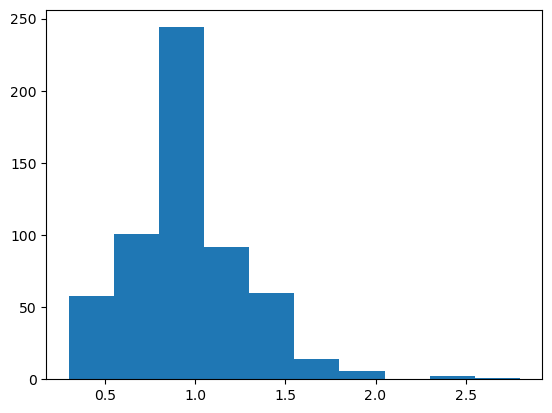

In [18]:
plt.hist(data['Albumin_and_Globulin_Ratio'])

In [19]:
data.Albumin_and_Globulin_Ratio.replace(0,np.median(data.Albumin_and_Globulin_Ratio),inplace=True)

In [20]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [21]:
data['Albumin_and_Globulin_Ratio'].isnull().sum()

4

In [22]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
208,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN,2
311,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [23]:
data.Albumin_and_Globulin_Ratio.replace(np.NaN,np.median(data.Albumin_and_Globulin_Ratio),inplace=True)


In [24]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [25]:
print(data['Albumin_and_Globulin_Ratio'].dtype)


float64


In [26]:
data['Albumin_and_Globulin_Ratio'].fillna(np.median(data['Albumin_and_Globulin_Ratio']), inplace=True)


In [27]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [28]:
data['Albumin_and_Globulin_Ratio'].fillna(np.median)   ###Replacing NaN values with Median

0      0.74
1      0.89
2       1.0
3       0.4
4       1.3
       ... 
577    0.37
578     1.1
579     1.0
580     1.0
581     1.5
Name: Albumin_and_Globulin_Ratio, Length: 582, dtype: object

In [29]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [30]:
data['Albumin_and_Globulin_Ratio'] = pd.to_numeric(data['Albumin_and_Globulin_Ratio'], errors='coerce')

In [31]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [32]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

Checking for outliers

In [33]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print("Outliers detected per column:\n", outlier_mask.sum())

Outliers detected per column:
 Age                             0
Gender                        141
Total_Bilirubin                84
Direct_Bilirubin               81
Alkaline_Phosphotase           66
Alanine_Aminotransferase       73
Aspartate_Aminotransferase     66
Total_Proteins                  8
Albumin                         0
Albumin_and_Globulin_Ratio     10
Target                          0
dtype: int64


In [153]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Exploratory Data Analysis

### Univariate Analysis

In [34]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

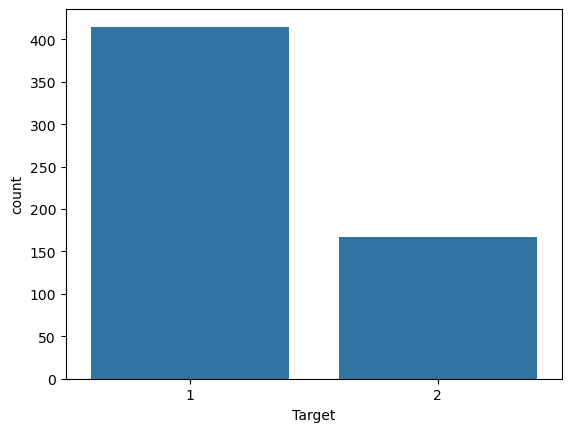

In [35]:
sns.countplot(x='Target',data=data)
plt.show

<Axes: xlabel='Total_Bilirubin', ylabel='Count'>

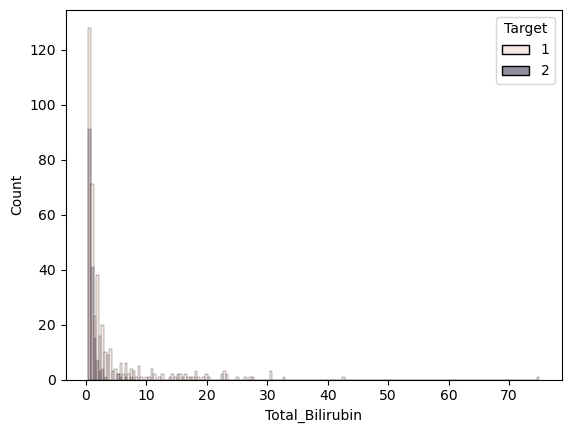

In [36]:
sns.histplot(x='Total_Bilirubin',hue='Target',data=data)

<Axes: xlabel='Total_Proteins', ylabel='Count'>

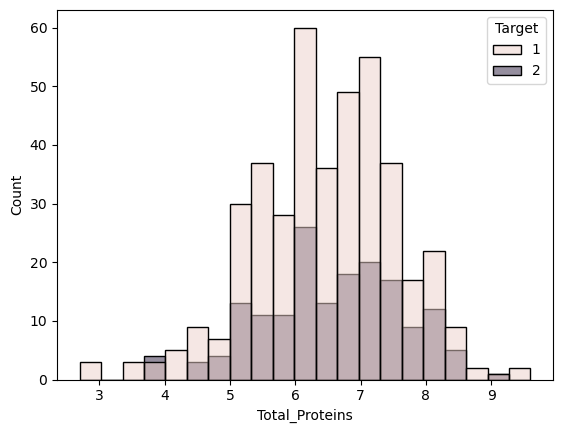

In [37]:
sns.histplot(x='Total_Proteins',hue='Target',data=data)

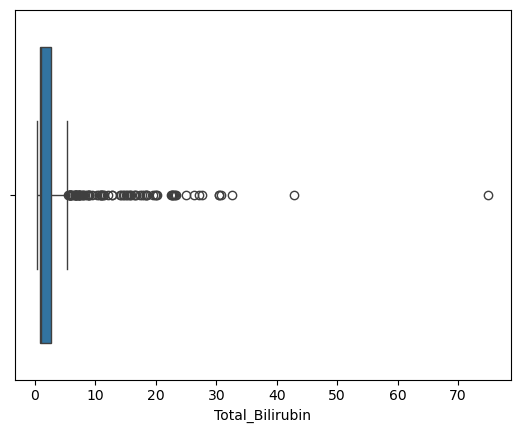

In [38]:
sns.boxplot(x='Total_Bilirubin',data=data)
plt.show()

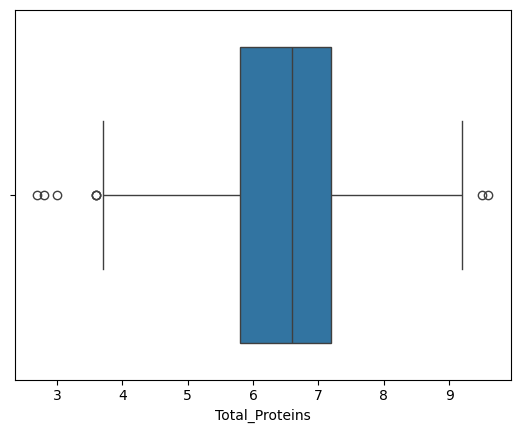

In [39]:
sns.boxplot(x='Total_Proteins',data=data)
plt.show()

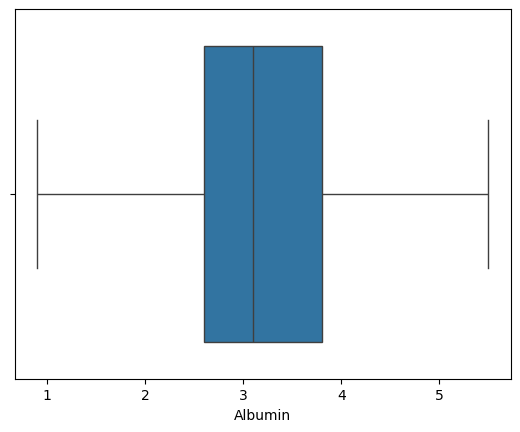

In [40]:
sns.boxplot(x='Albumin',data=data)
plt.show()

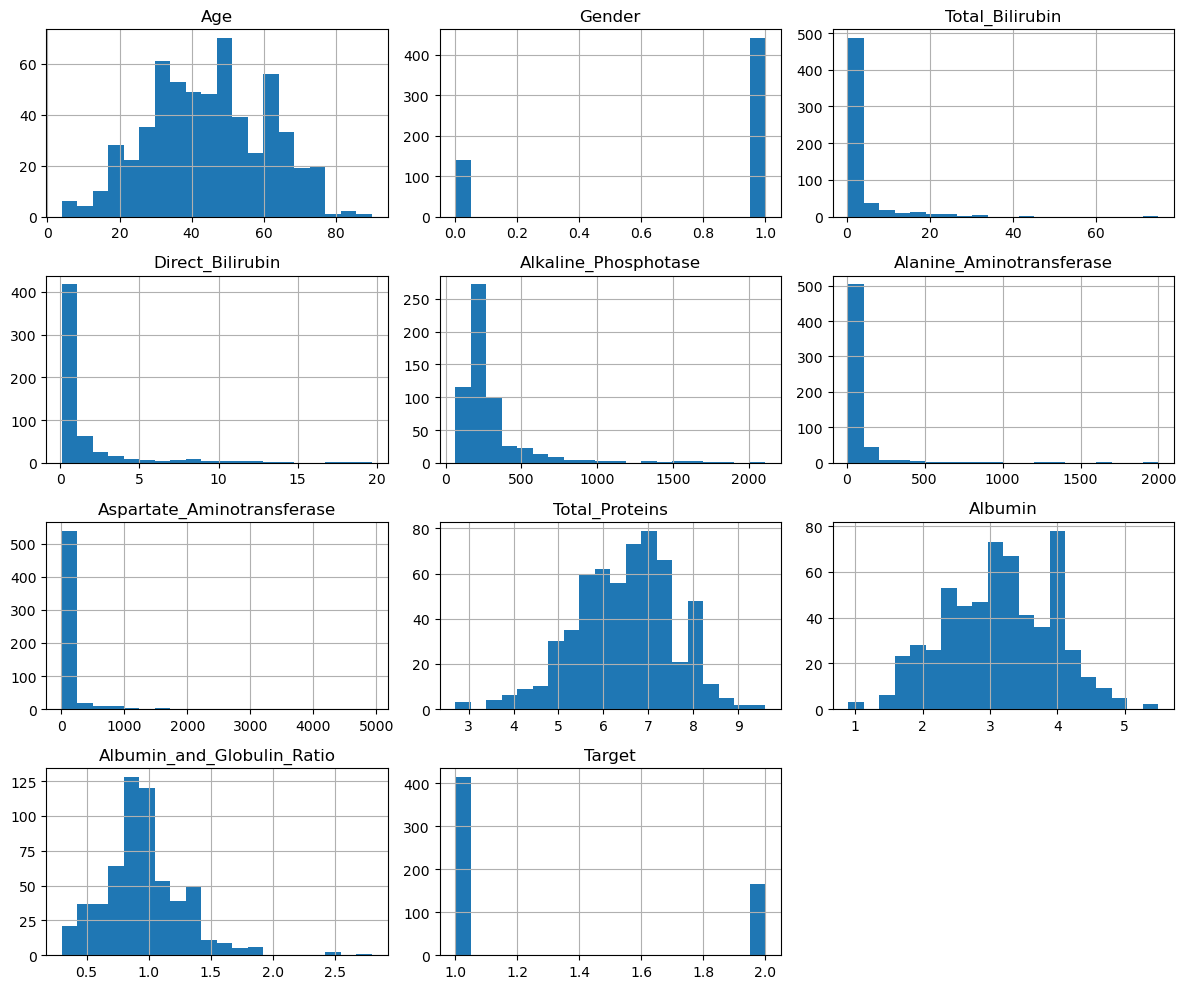

In [41]:
data.hist(bins=20, figsize=(12,10))
plt.tight_layout()

## Bivariate Analysis

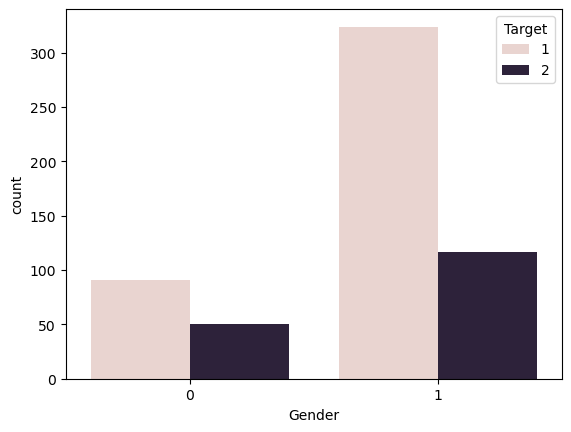

In [42]:
sns.countplot(x='Gender',hue='Target',data=data)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

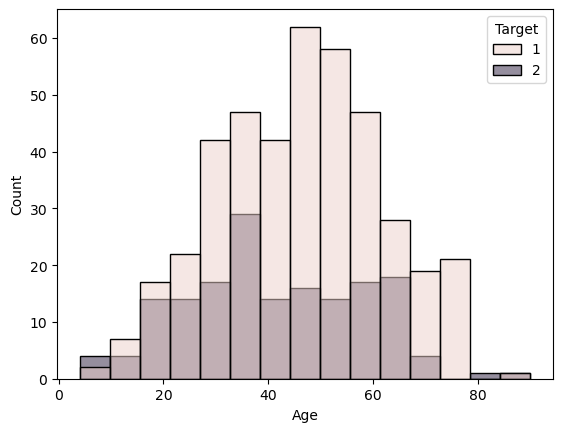

In [43]:
sns.histplot(x='Age',hue='Target',data=data)

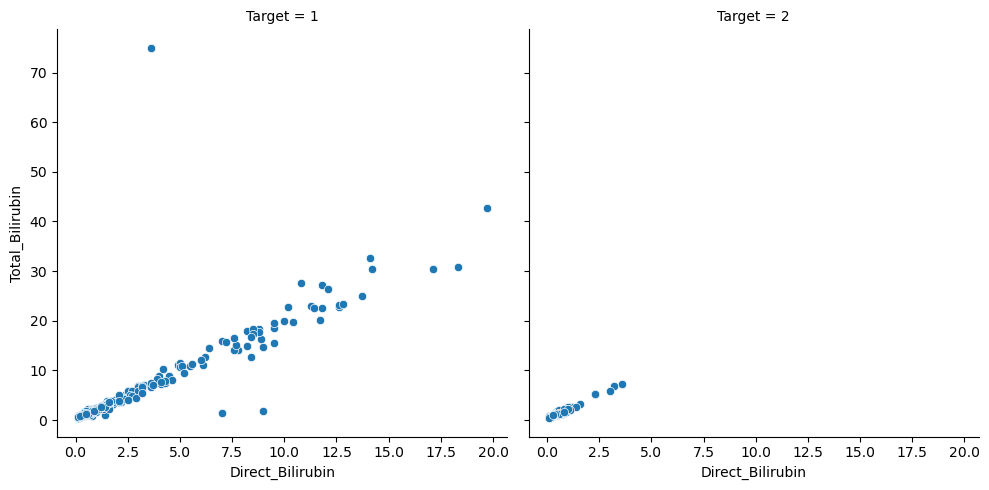

In [44]:
sns.relplot(x='Direct_Bilirubin',y='Total_Bilirubin',col='Target',data=data)
plt.show()

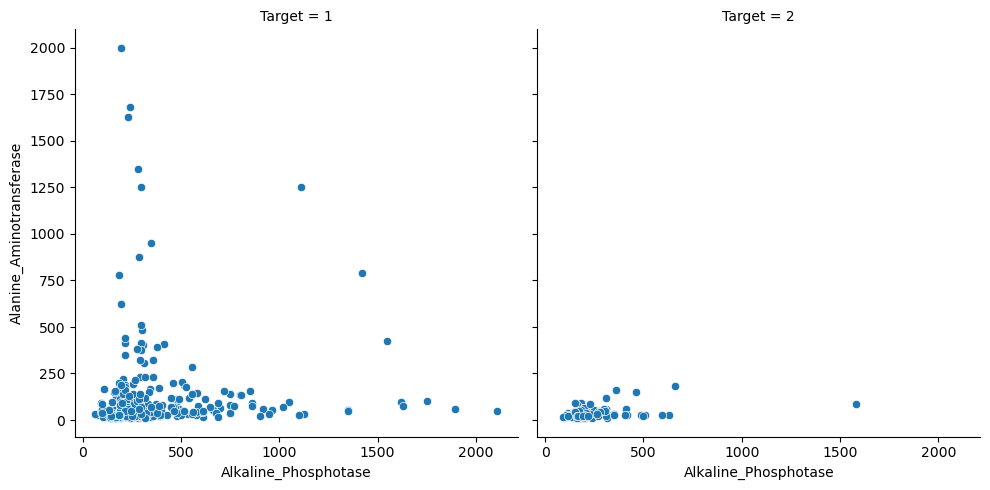

In [45]:
sns.relplot(x='Alkaline_Phosphotase',y='Alanine_Aminotransferase',col='Target',data=data)
plt.show()

# Modeling

## Logistic Regression

In [46]:
X=data.iloc[:,:-1]
y=data.Target

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=45)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(max_iter=2000,class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [51]:
y_pred= model.predict(X_test)

In [52]:
y_pred

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1], dtype=int64)

In [53]:
y_pred_prob=model.predict_proba(X_test)

In [54]:
y_pred_prob

array([[9.72727312e-01, 2.72726883e-02],
       [6.58227369e-01, 3.41772631e-01],
       [2.90211662e-01, 7.09788338e-01],
       [7.17427127e-01, 2.82572873e-01],
       [3.89825924e-01, 6.10174076e-01],
       [9.62726674e-01, 3.72733257e-02],
       [3.54378606e-01, 6.45621394e-01],
       [6.57874108e-01, 3.42125892e-01],
       [3.89828098e-01, 6.10171902e-01],
       [2.91763619e-01, 7.08236381e-01],
       [3.41589837e-01, 6.58410163e-01],
       [6.58530618e-01, 3.41469382e-01],
       [9.91354185e-01, 8.64581516e-03],
       [6.37632935e-01, 3.62367065e-01],
       [9.04794386e-01, 9.52056138e-02],
       [8.23191392e-01, 1.76808608e-01],
       [3.15910427e-01, 6.84089573e-01],
       [4.82646796e-01, 5.17353204e-01],
       [3.41702086e-01, 6.58297914e-01],
       [5.24623467e-01, 4.75376533e-01],
       [5.41451886e-01, 4.58548114e-01],
       [3.09552785e-01, 6.90447215e-01],
       [7.79135262e-01, 2.20864738e-01],
       [3.49803419e-01, 6.50196581e-01],
       [9.903827

In [55]:
data.Target.value_counts()

Target
1    415
2    167
Name: count, dtype: int64

## Evaluation of the model

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, roc_curve

In [57]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[51 38]
 [ 2 26]]


In [58]:
recall=recall_score(y_test,y_pred)
recall

0.5730337078651685

In [59]:
precision=precision_score(y_test,y_pred)
precision

0.9622641509433962

In [60]:
f1score=f1_score(y_test,y_pred)
f1score

0.7183098591549296

In [61]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6581196581196581

In [62]:
rocauc=roc_auc_score(y_test,y_pred)
rocauc

0.7508025682182986

In [63]:
metrics_lr = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1score, 'ROC-AUC' : rocauc}

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=5)]      # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt','log2']        # maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=5)]            # List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [5, 10]          # minimum number of samples required to split an internal node
min_samples_leaf = [2, 4]

In [66]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [67]:
rf_clf1 = RandomForestClassifier(random_state=42)   # Loading the model

rf_cv = GridSearchCV(estimator=rf_clf1, scoring='f1',param_grid= random_grid, cv=3,
                               verbose=2, n_jobs=-1)

In [68]:
sample_weights = np.ones(len(y_train)) 

In [69]:
sample_weights

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [70]:
rf_cv.fit(X_train, y_train,sample_weight=sample_weights)      # training data on randomsearch cv
rf_best_params = rf_cv.best_params_       # it will give you best parameters
print(f"Best paramters: {rf_best_params})") 

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best paramters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 2000})


In [71]:
rfmodel = RandomForestClassifier(n_estimators=2000,min_samples_leaf=2,min_samples_split=5,max_features="sqrt",max_depth=10)
rfmodel.fit(X_train, y_train, sample_weight=sample_weights)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=2000)

In [72]:
y_pred1= rfmodel.predict(X_test)

In [73]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [74]:
data.Target.value_counts()

Target
1    415
2    167
Name: count, dtype: int64

## Evaluation of the model

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [76]:
rfcm=confusion_matrix(y_test,y_pred1)
print(rfcm)

[[80  9]
 [21  7]]


In [77]:
rf_recall=recall_score(y_test,y_pred1)
rf_recall

0.898876404494382

In [78]:
rf_precision=precision_score(y_test,y_pred1)
rf_precision

0.7920792079207921

In [79]:
rf_f1score=f1_score(y_test,y_pred1)
rf_f1score

0.8421052631578947

In [80]:
rf_accuracy=accuracy_score(y_test,y_pred1)
rf_accuracy

0.7435897435897436

In [81]:
rf_rocauc=roc_auc_score(y_test,y_pred1)
rf_rocauc

0.574438202247191

In [82]:
metrics_rf = {'accuracy': rf_accuracy, 'precision': rf_precision, 'recall': rf_recall, 'f1': rf_f1score, 'ROC-AUC' : rf_rocauc}

## SVM

In [83]:
from sklearn.svm import SVC

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smote=SMOTE()

In [86]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [87]:
len(y_train)

465

In [88]:
len(y_train_smote)

652

In [89]:
from itertools import product  # Importing the product function from itertools module

param_grid_linear = {           #  Define Parameter grid for linear kernel SVM
    'C': [0.1, 5, 10,50,60,70],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}
param_grid_rbf = {              # Define Parameter grid for Radial Basic Function-RBF
    'C': [0.1, 5, 10,50,60,70],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_poly = {             # Define Parameters grid for Polynomial kernel
    'C': [0.1, 10,50],
    'kernel': ['poly'],
    'gamma': ['scale'],
    'degree': [2, 3]
}

In [90]:
svm_model=SVC()

In [91]:
grid = GridSearchCV(svm_model,param_grid=param_grid_poly, refit = True, verbose = 2,scoring='f1',cv=5, n_jobs=-1)

In [92]:
grid.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 50], 'degree': [2, 3],
                         'gamma': ['scale'], 'kernel': ['poly']},
             scoring='f1', verbose=2)

In [93]:
print(grid.best_params_)

{'C': 50, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [94]:
svm_model = SVC(C=50, degree=2, gamma='scale', kernel='poly')

In [95]:
svm_model.fit(X_train, y_train)

SVC(C=50, degree=2, kernel='poly')

In [96]:
y_pred2=svm_model.predict(X_test)

In [97]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Evaluation of model

In [98]:
svmcm=confusion_matrix(y_test,y_pred2)
print(svmcm)

[[89  0]
 [28  0]]


In [99]:
svm_recall=recall_score(y_test,y_pred2)
svm_recall

1.0

In [100]:
svm_precision=precision_score(y_test,y_pred2)
svm_precision

0.7606837606837606

In [101]:
svm_f1score=f1_score(y_test,y_pred2)
svm_f1score

0.8640776699029126

In [102]:
svm_accuracy=accuracy_score(y_test,y_pred2)
svm_accuracy

0.7606837606837606

In [103]:
svm_rocauc=roc_auc_score(y_test,y_pred2)
svm_rocauc

0.5

In [104]:
metrics_svm = {'accuracy': svm_accuracy, 'precision': svm_precision, 'recall': svm_recall, 'f1': svm_f1score,'ROC-AUC' : svm_rocauc}

## Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4,5,6,7],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

In [107]:
dt = DecisionTreeClassifier()                # object creation for decision tree with random state 3
tree_cv = GridSearchCV(dt, params, scoring="f1", n_jobs=-1, verbose=2, cv=5)

In [108]:
tree_cv.fit(X_train,y_train,sample_weight=sample_weights)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params})")   # printing  best parameters

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4, 'splitter': 'random'})


In [109]:
dtmodel = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=4,splitter='random')

In [110]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=4, splitter='random')

In [111]:
y_pred3=dtmodel.predict(X_test)

In [112]:
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Evaluation of model

In [113]:
dtcm=confusion_matrix(y_test,y_pred3)
print(dtcm)

[[89  0]
 [28  0]]


In [114]:
dt_recall=recall_score(y_test,y_pred3)
dt_recall

1.0

In [115]:
dt_precision=precision_score(y_test,y_pred3)
dt_precision

0.7606837606837606

In [116]:
dt_f1score=f1_score(y_test,y_pred3)
dt_f1score

0.8640776699029126

In [117]:
dt_accuracy=accuracy_score(y_test,y_pred3)
dt_accuracy

0.7606837606837606

In [118]:
dt_rocauc=roc_auc_score(y_test,y_pred3)
dt_rocauc

0.5

In [119]:
metrics_dt = {'accuracy': dt_accuracy, 'precision': dt_precision, 'recall': dt_recall, 'f1': dt_f1score,'ROC-AUC' : dt_rocauc}

## K-Neighbors Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knnmodel=KNeighborsClassifier(n_neighbors=7)

In [122]:
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [123]:
y_pred4=dtmodel.predict(X_test)

In [124]:
y_pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Evaluation of model

In [125]:
knncm=confusion_matrix(y_test,y_pred4)
print(knncm)

[[89  0]
 [28  0]]


In [126]:
knn_recall=recall_score(y_test,y_pred4)
knn_recall

1.0

In [127]:
knn_precision=precision_score(y_test,y_pred4)
knn_precision

0.7606837606837606

In [128]:
knn_f1score=f1_score(y_test,y_pred4)
knn_f1score

0.8640776699029126

In [129]:
knn_accuracy=accuracy_score(y_test,y_pred4)
knn_accuracy

0.7606837606837606

In [130]:
knn_rocauc=roc_auc_score(y_test,y_pred4)
knn_rocauc

0.5

In [131]:
metrics_knn = {'accuracy': knn_accuracy, 'precision': knn_precision, 'recall': knn_recall, 'f1': knn_f1score,'ROC-AUC' : knn_rocauc}

## XGBoost Model

In [132]:
!pip install xgboost

In [133]:
from xgboost import XGBClassifier

In [134]:
param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

In [135]:
XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)  # Assigning XGBClassifier model into variables
rcv= GridSearchCV(estimator=XGB, scoring='f1',refit=True,param_grid=param_grid,  cv=3,
                               verbose=1, n_jobs=-1)

In [136]:
y_train1=y_train - 1

In [137]:
rcv.fit(X_train,y_train1,sample_weight=sample_weights)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Best paramters: {'gamma': 0.1, 'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 80, 'reg_alpha': 0.4, 'reg_lambda': 0.2})


In [138]:
xgbmodel = XGBClassifier(gamma=0.1,learning_rate=0.06,max_depth=6,n_estimators=80,reg_alpha=0.4,reg_lambda=0.2)

In [139]:
xgbmodel.fit(X_train, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)

In [140]:
y_pred5=xgbmodel.predict(X_test)

In [141]:
y_pred5

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0])

## Evaluation of model

In [142]:
y_test1=y_test - 1

In [143]:
xgbcm=confusion_matrix(y_test1,y_pred5)
print(xgbcm)

[[80  9]
 [19  9]]


In [144]:
xgb_recall=recall_score(y_test1,y_pred5)
xgb_recall

0.32142857142857145

In [145]:
xgb_precision=precision_score(y_test1,y_pred5)
xgb_precision

0.5

In [146]:
xgb_f1score=f1_score(y_test1,y_pred5)
xgb_f1score

0.391304347826087

In [147]:
xgb_accuracy=accuracy_score(y_test1,y_pred5)
xgb_accuracy

0.7606837606837606

In [148]:
xgb_rocauc=roc_auc_score(y_test,y_pred5)
xgb_rocauc

0.6101524879614767

In [149]:
metrics_xgb = {'accuracy': xgb_accuracy, 'precision': xgb_precision, 'recall': xgb_recall, 'f1': xgb_f1score, 'ROC-AUC' : xgb_rocauc}

# Model Comparison Report

In [150]:
all_metrics = {'Logistic Regression': metrics_lr,'Random Forest': metrics_rf,'XGBoost': metrics_xgb, 'K-Nearest Neighbour': metrics_knn, 'Decision Tree': metrics_dt,'SVM': metrics_svm}
metrics_data = pd.DataFrame(all_metrics).T

In [151]:
metrics_data

,accuracy,precision,recall,f1,ROC-AUC
Logistic Regression,0.658120,0.962264,0.573034,0.718310,0.750803
Random Forest,0.743590,0.792079,0.898876,0.842105,0.574438
XGBoost,0.760684,0.500000,0.321429,0.391304,0.610152
K-Nearest Neighbour,0.760684,0.760684,1.000000,0.864078,0.500000
Decision Tree,0.760684,0.760684,1.000000,0.864078,0.500000
SVM,0.760684,0.760684,1.000000,0.864078,0.500000


## Best Model: Logistic Regression/Random Forest

Best general model (balanced) - Logistic Regression	 has High precision, best ROC-AUC (0.75)
Random Forest model has Higher F1 & Recall - Better F1 (0.8298), but lower ROC_AUC score

# Challenges & Mitigations

**Imbalanced Classes:** The dataset typically has more liver-disease than non-disease cases (e.g., 416 vs 167).  
- *Mitigation:* Used `class_weight='balanced'` where supported, and SMOTE oversampling pipeline.

**Missing Values:** Especially in **Albumin_and_Globulin_Ratio** in some copies of the dataset.  
- *Mitigation:* Median imputation for numeric features

**Outliers:** Liver enzymes (ALT/AST/ALP) can have extreme values.  
- *Mitigation:* Robust modeling with tree-based methods and regularized linear models; scaling for distance-based models (KNN, SVC).

**Small Sample Size:** With a few hundred records total, there is risk of overfitting.  
- *Mitigation:* Cross-validation, simpler model baselines, and careful hyperparameters. You can extend with nested CV if time allows.
